### Problem Statement:

The Goal of this Projet is to give people an estimate of how much they need based on their individual health stituation. After that, customers can work with any health insurance carrier and its plans and perks while keeping the projected cost from our study in mind. This can assist a person in concentrating on the health side of an insurance policy rather than ineffective part.

In [148]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)

%matplotlib inline
sns.set()

In [149]:
logging.basicConfig(filename='Jupyter_Notebook_logs.log', level=logging.INFO,
                    format='%(levelname)s:%(asctime)s:%(message)s')

In [150]:
# importing dataset

data = pd.read_csv('insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [151]:
# checking the dimensions of the dataframe

data.shape

(1338, 7)

In [152]:
# Checking missing value in dataset

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [153]:
# Checking number of unique elements in the columns

data.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [154]:
# Checking how much memory each column uses in bytes

data.memory_usage()

Index         128
age         10704
sex         10704
bmi         10704
children    10704
smoker      10704
region      10704
expenses    10704
dtype: int64

In [155]:
# Checking type and value count of each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [156]:
# Column Children should be object column

data['children'] = data['children'].astype('object')

In [157]:
# Checking type and value count of each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [158]:
# Checking the statistical aspects of the dataframe

data.describe()

,age,bmi,expenses
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,13270.422414
std,14.049960,6.098382,12110.011240
min,18.000000,16.000000,1121.870000
25%,27.000000,26.300000,4740.287500
50%,39.000000,30.400000,9382.030000
75%,51.000000,34.700000,16639.915000
max,64.000000,53.100000,63770.430000


In [159]:
logging.info('model checks are done')

### Data Visualization

- Univariate analysis

In [160]:
# Plotting numerical columns

num_cols = data.select_dtypes(exclude = 'object')
num_cols.columns

Index(['age', 'bmi', 'expenses'], dtype='object')

In [161]:
cat_cols = data.select_dtypes(include = 'object')

cat_cols.columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

<Figure size 1080x432 with 0 Axes>

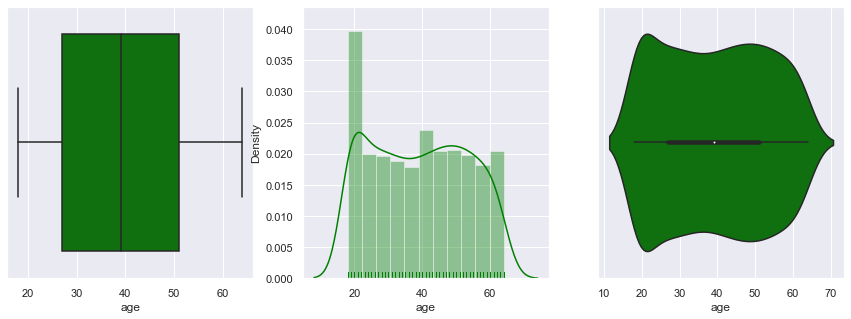

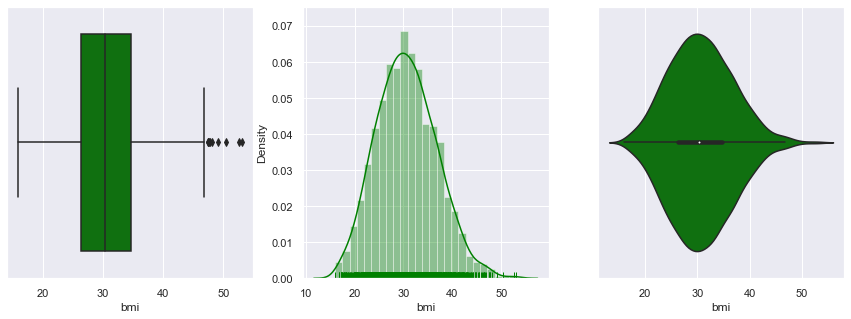

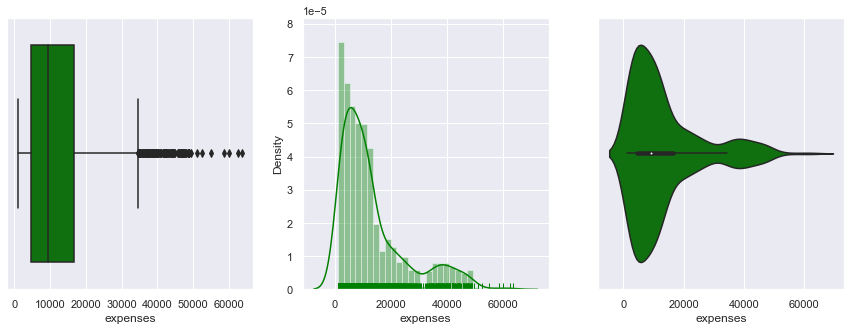

In [162]:
plt.figure(figsize = (15,6))
f_num = num_cols.columns[:]

for i in enumerate(f_num):
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(131)
    sns.boxplot(num_cols[i[1]], color= 'Green')

    ax1 = f.add_subplot(132)
    sns.distplot(num_cols[i[1]], rug = True,  color= 'Green')
    
    ax2 = f.add_subplot(133)
    sns.violinplot(num_cols[i[1]], orient= 'vertical',  color= 'Green')
    
    plt.show()

<Figure size 1080x720 with 0 Axes>

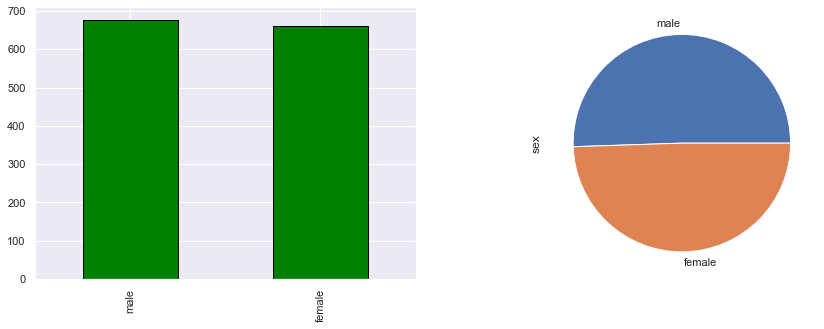

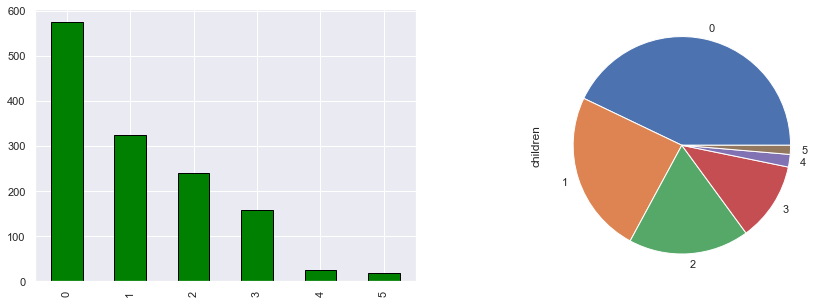

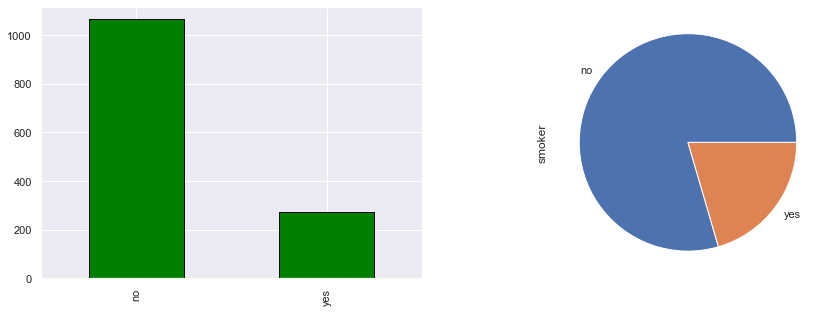

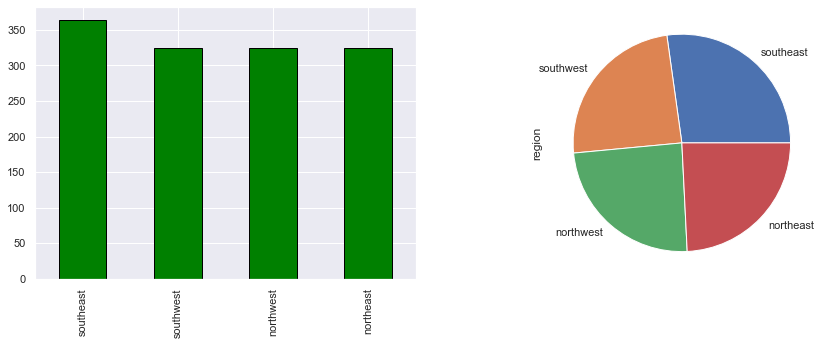

In [163]:
plt.figure(figsize = (15,10))

f_cat = cat_cols.columns[:]

for i in enumerate(f_cat):
    
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(121)
    cat_cols[i[1]].value_counts().plot.bar(color= 'Green',edgecolor='Black')

    ax1 = f.add_subplot(122)
    cat_cols[i[1]].value_counts().plot.pie()
    
    
    plt.show()

## Outlier detection

In [164]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [165]:
for i in num_cols.columns:
    print(i)
    print(num_cols[i].quantile([0.1,0.9,0.95,0.99]))
    print('\n')

age
0.10    19.0
0.90    59.0
0.95    62.0
0.99    64.0
Name: age, dtype: float64


bmi
0.10    23.000
0.90    38.630
0.95    41.100
0.99    46.389
Name: bmi, dtype: float64


expenses
0.10     2346.5350
0.90    34831.7160
0.95    41181.8260
0.99    48537.4806
Name: expenses, dtype: float64




In [166]:
logging.info('Outlier treatment done')

### Data Visualization
- Bivariate analysis of Numerical columns w.r.t. target column expenses

<Figure size 1080x720 with 0 Axes>

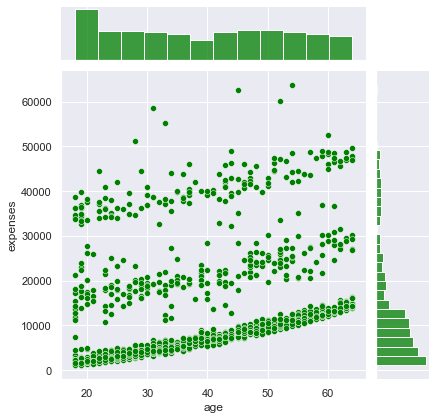

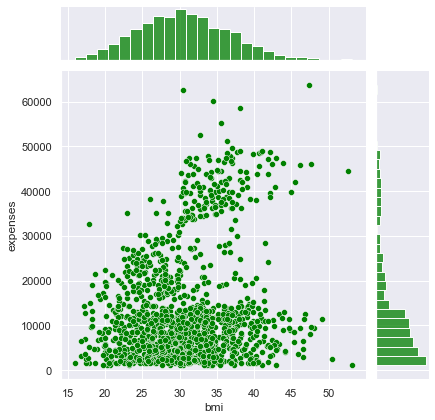

In [167]:
plt.figure(figsize = (15,10))

f_num = num_cols.columns[:-1]

for i in enumerate(f_num):

    sns.jointplot(num_cols[i[1]],y= data.expenses, color= 'Green', kind = 'scatter')
    plt.show()


### Data Visualization
- Bivariate analysis of categorical columns w.r.t. target column expenses

<Figure size 1080x576 with 0 Axes>

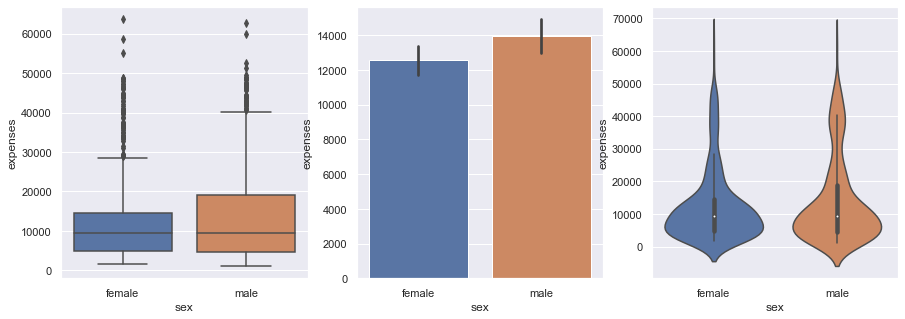

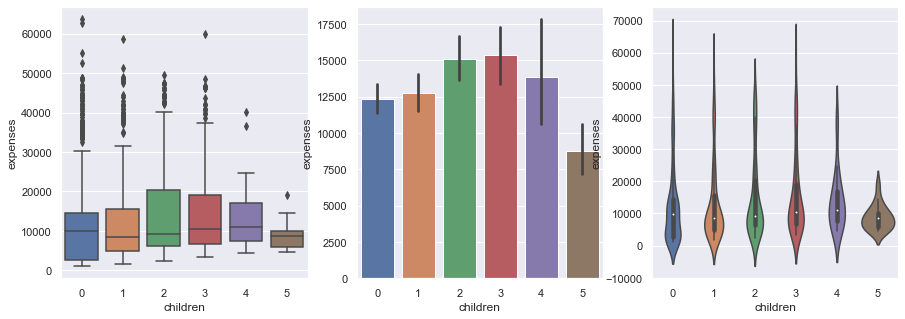

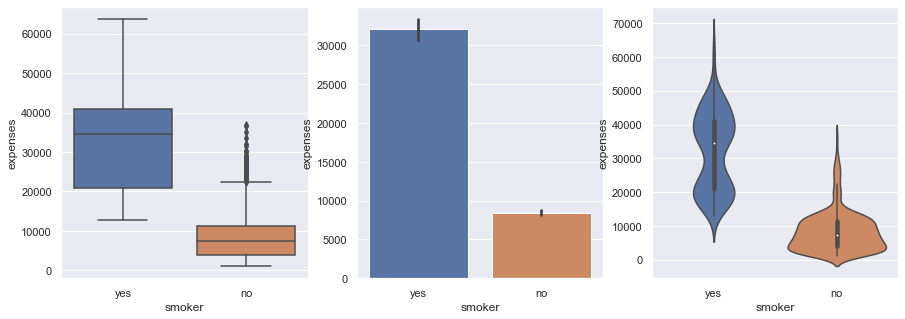

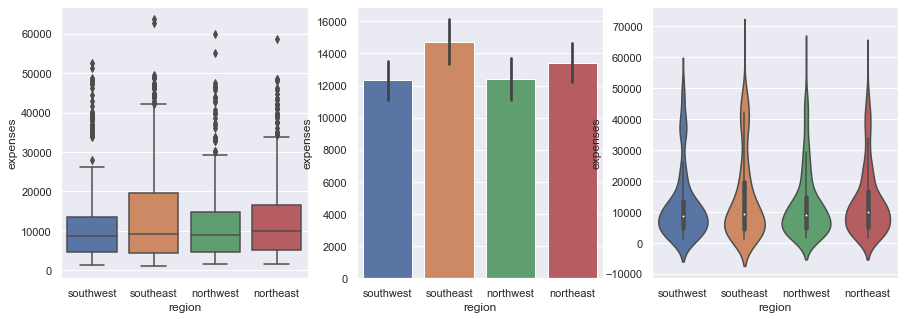

In [168]:
plt.figure(figsize = (15,8))

f_cat = cat_cols.columns[:]

for i in enumerate(f_cat):
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(131)
    sns.boxplot(x = cat_cols[i[1]], y= data.expenses)

    ax1 = f.add_subplot(132)
    sns.barplot(x = cat_cols[i[1]], y= data.expenses)
    
    ax2 = f.add_subplot(133)
    sns.violinplot(x = cat_cols[i[1]], y= data.expenses, orient= 'vertical')
    
    plt.show()

### Data Visualization
- Multivariate analysis

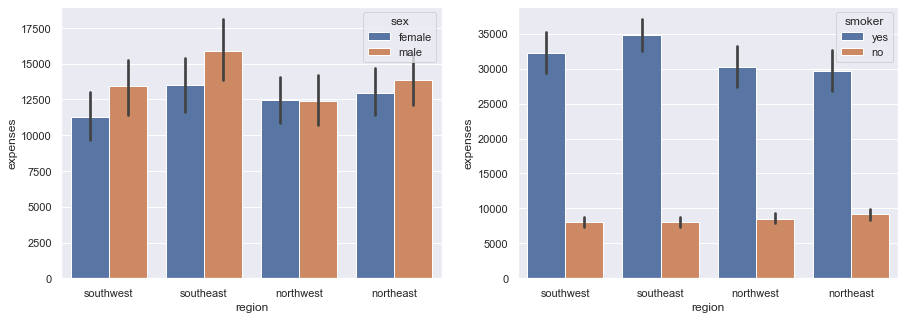

In [169]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.barplot(data.region, data.expenses, hue = data.sex)

ax1 = f.add_subplot(122)
sns.barplot(data.region, data.expenses, hue = data.smoker)
plt.show()

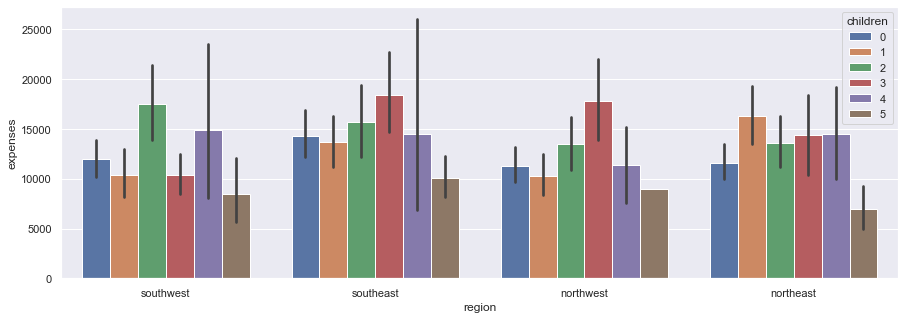

In [170]:
plt.figure(figsize=(15,5))
sns.barplot(data.region, data.expenses, hue = data.children)
plt.show()

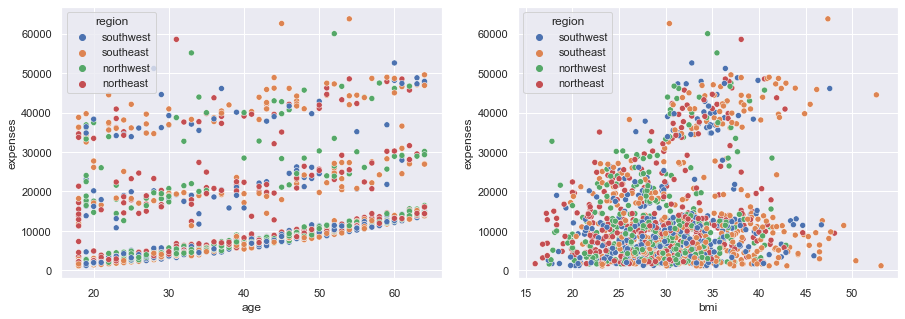

In [171]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.scatterplot(data.age, data.expenses, hue = data.region)

ax1 = f.add_subplot(122)
sns.scatterplot(data.bmi, data.expenses, hue = data.region)
plt.show()

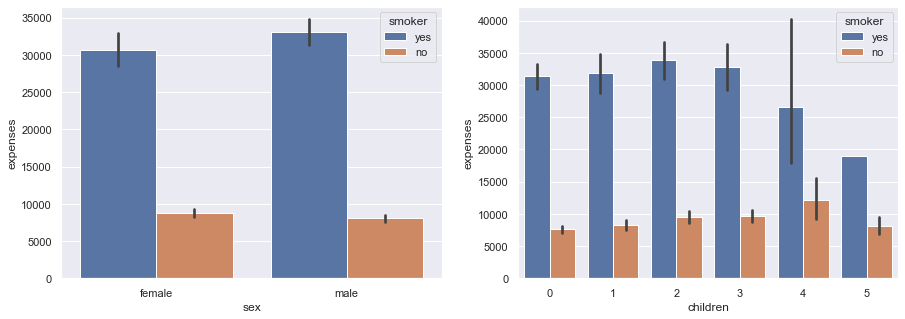

In [172]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.barplot(data.sex, data.expenses, hue = data.smoker)

ax1 = f.add_subplot(122)
sns.barplot(data.children, data.expenses, hue = data.smoker)
plt.show()

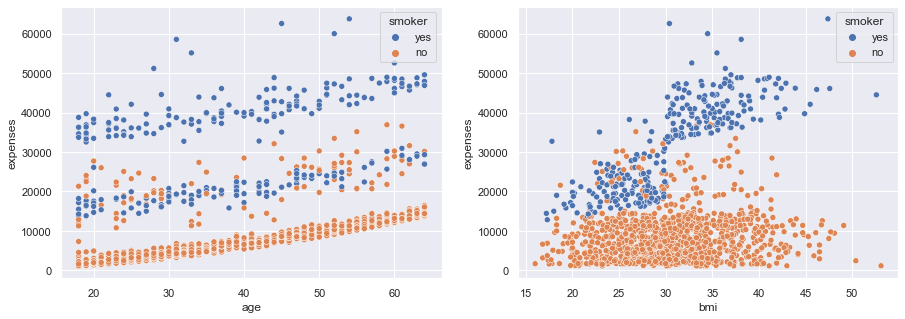

In [173]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.scatterplot(data.age, data.expenses, hue = data.smoker)

ax1 = f.add_subplot(122)
sns.scatterplot(data.bmi, data.expenses, hue = data.smoker)
plt.show()

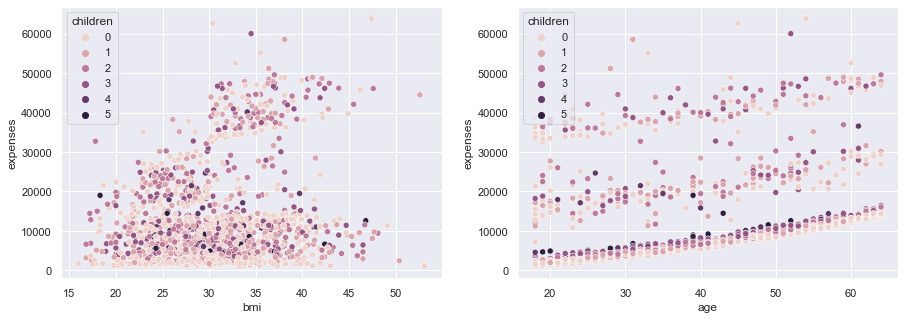

In [174]:
f = plt.figure(figsize=(15,5))

ax1 = f.add_subplot(121)
sns.scatterplot(data.bmi, data.expenses, hue = data.children)

ax2 = f.add_subplot(122)
sns.scatterplot(data.age, data.expenses, hue = data.children)
plt.show()

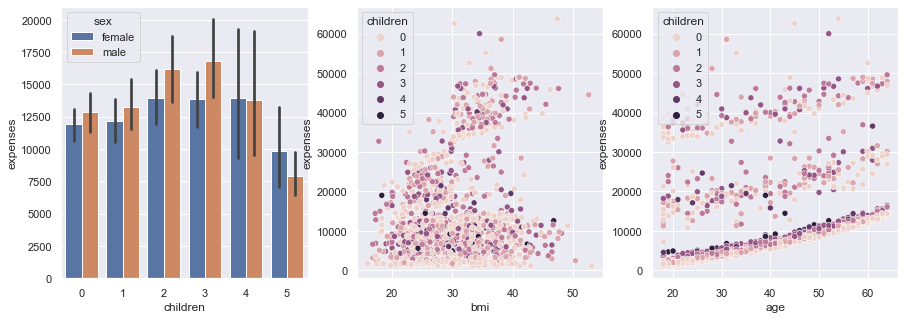

In [175]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(131)
sns.barplot(data.children, data.expenses, hue = data.sex)

ax1 = f.add_subplot(132)
sns.scatterplot(data.bmi, data.expenses, hue = data.children)

ax2 = f.add_subplot(133)
sns.scatterplot(data.age, data.expenses, hue = data.children)
plt.show()

### Target Variable- Expenses

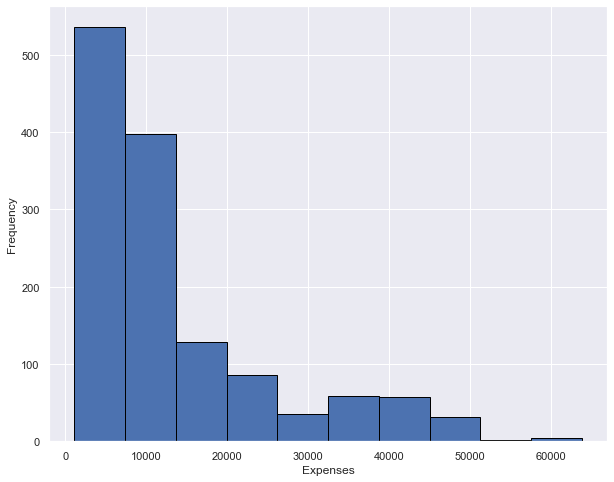

In [176]:
plt.figure(figsize = (10,8))
plt.hist(data['expenses'], edgecolor = 'black')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.show()

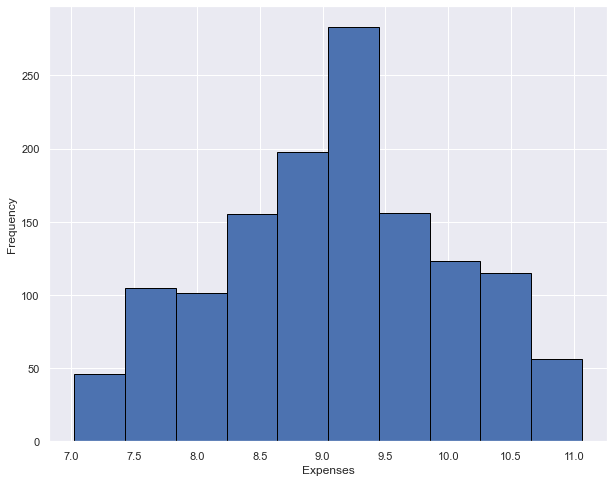

In [177]:
# Using log Transformation

data['expenses'] = np.log1p(data['expenses'])

# Plotting histogram

plt.figure(figsize = (10,8))
plt.hist(data['expenses'], edgecolor = 'black')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.show()

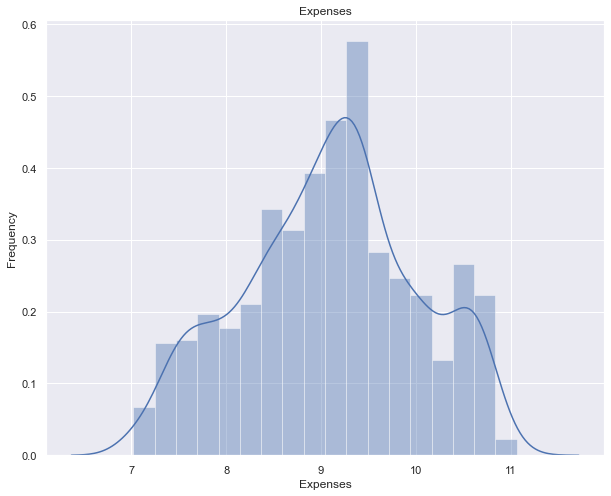

In [178]:
# Distribution of errors

plt.figure(figsize = (10,8))

p = sns.distplot(data['expenses'],kde=True)

p = plt.title('Expenses')

plt.xlabel("Expenses")
plt.ylabel("Frequency")
plt.show()

### Data Visualization
- Pairplot & Heatmap

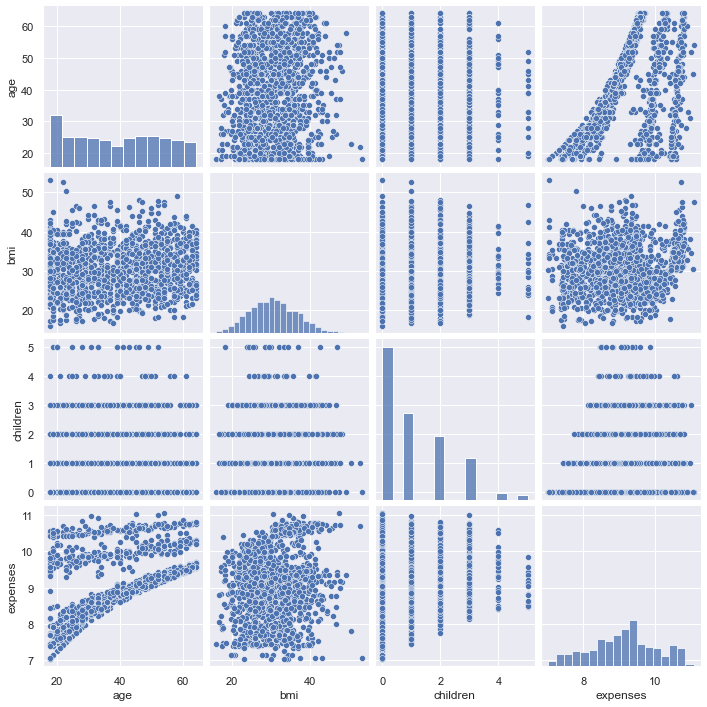

In [179]:
sns.pairplot(data)
plt.show()

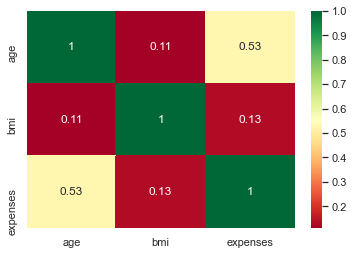

In [180]:
sns.heatmap(data.corr(), cmap= 'RdYlGn', annot = True)
plt.show()

In [181]:
logging.info('Data Visualization done')

### Feature Engineering

In [182]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,9.734235
1,18,male,33.8,1,no,southeast,7.453880
2,28,male,33.0,3,no,southeast,8.400763
3,33,male,22.7,0,no,northwest,9.998137
4,32,male,28.9,0,no,northwest,8.260457


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [184]:
# Column sex
sex_dummies = pd.get_dummies(data.sex, drop_first= True)

data = pd.concat([data, sex_dummies], axis = 1)

# Column smoker
smoker_dummies = pd.get_dummies(data.smoker, drop_first= True)

data = pd.concat([data, smoker_dummies], axis = 1)

# Column region
region_dummies = pd.get_dummies(data.region,prefix = 'region_', drop_first= True)

data = pd.concat([data, region_dummies], axis = 1)

In [185]:
data.head()

,age,sex,bmi,children,smoker,region,expenses,male,yes,region__northwest,region__southeast,region__southwest
0,19,female,27.9,0,yes,southwest,9.734235,0,1,0,0,1
1,18,male,33.8,1,no,southeast,7.453880,1,0,0,1,0
2,28,male,33.0,3,no,southeast,8.400763,1,0,0,1,0
3,33,male,22.7,0,no,northwest,9.998137,1,0,1,0,0
4,32,male,28.9,0,no,northwest,8.260457,1,0,1,0,0


In [186]:
data=data.drop('sex', axis=1)
data=data.drop('smoker', axis=1)
data=data.drop('region', axis=1)
data.head()

,age,bmi,children,expenses,male,yes,region__northwest,region__southeast,region__southwest
0,19,27.9,0,9.734235,0,1,0,0,1
1,18,33.8,1,7.453880,1,0,0,1,0
2,28,33.0,3,8.400763,1,0,0,1,0
3,33,22.7,0,9.998137,1,0,1,0,0
4,32,28.9,0,8.260457,1,0,1,0,0


In [187]:
data.head()

,age,bmi,children,expenses,male,yes,region__northwest,region__southeast,region__southwest
0,19,27.9,0,9.734235,0,1,0,0,1
1,18,33.8,1,7.453880,1,0,0,1,0
2,28,33.0,3,8.400763,1,0,0,1,0
3,33,22.7,0,9.998137,1,0,1,0,0
4,32,28.9,0,8.260457,1,0,1,0,0


In [188]:
data['expenses'] = round(data['expenses'],2)

In [273]:
data.head()

,age,bmi,children,expenses,male,yes,region__northwest,region__southeast,region__southwest
0,19,27.9,0,9.73,0,1,0,0,1
1,18,33.8,1,7.45,1,0,0,1,0
2,28,33.0,3,8.40,1,0,0,1,0
3,33,22.7,0,10.00,1,0,1,0,0
4,32,28.9,0,8.26,1,0,1,0,0


In [189]:
logging.info('Feature engineering done')

In [190]:
X= data.drop(['expenses'], axis = 1)
y = data['expenses']

In [191]:
# Train_test_split

from sklearn.model_selection import train_test_split

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state= 42)

In [193]:
X_train.shape

(1003, 8)

In [194]:
X_test.shape

(335, 8)

In [195]:
y_train.shape

(1003,)

In [196]:
y_test.shape

(335,)

In [197]:
logging.info('Train Test Split done')

## Linear regression

In [198]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

linear_reg = lr.fit(X_train, y_train)
linear_reg

LinearRegression()

In [199]:
y_pred_lin = linear_reg.predict(X_train)
y_pred_lin

array([ 8.04724271,  8.4031313 ,  9.22731097, ...,  9.30317441,
       10.56128976,  9.14089157])

In [200]:
# Linear regression metrics

from sklearn import metrics

r2_score_train_lin = metrics.r2_score(y_train, y_pred_lin)

print(f'R2 score train= {r2_score_train_lin}')

R2 score train= 0.7640418463005517


In [201]:
MSE_train = metrics.mean_squared_error(y_train,y_pred_lin)

print(f' MSE train = {MSE_train}')

 MSE train = 0.1977771969810158


In [202]:
y_test_pred_lin = linear_reg.predict(X_test)

In [203]:
r2_score_test_lin = metrics.r2_score(y_test, y_test_pred_lin)

print(f'R2 score test = {r2_score_test_lin}')

R2 score test = 0.7780463913807814


In [204]:
MSE_test_lin = metrics.mean_squared_error(y_test,y_test_pred_lin)
print(f'MSE test = {MSE_test_lin}')

MSE test = 0.1916980389993224


In [205]:
print(f'R2 score train= {round(r2_score_train_lin,2)}')
print(f'R2 score test = {round(r2_score_test_lin,2)}')

R2 score train= 0.7640418463005517
R2 score test = 0.7780463913807814


In [206]:
# Residual analysis

y_res = y_train - y_pred_lin

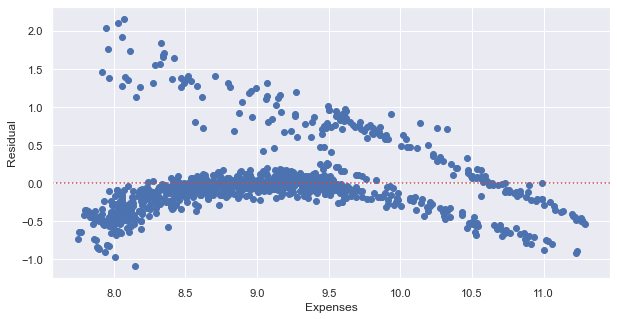

In [207]:
# Residual v/s predictions plot

plt.figure(figsize = (10,5))
plt.scatter( y_pred_lin , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Expenses")
plt.ylabel("Residual")
plt.show()

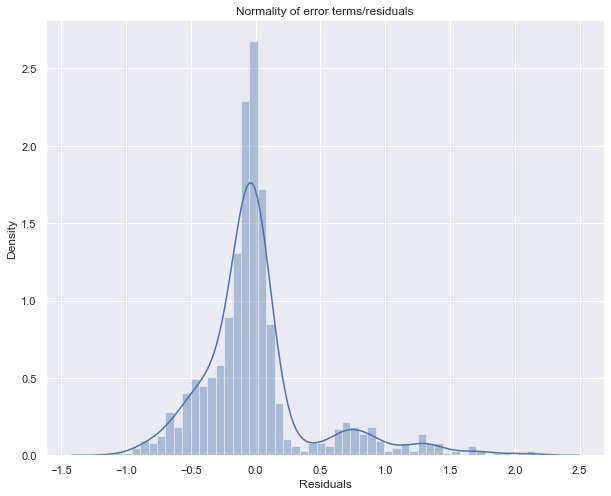

In [208]:
# Distribution of errors

plt.figure(figsize = (10,8))

p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')

plt.xlabel("Residuals")
plt.show()

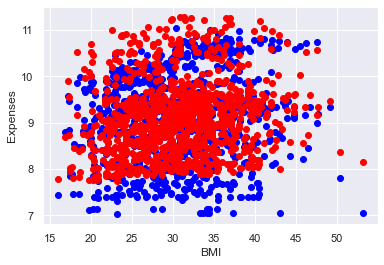

In [209]:
# Visual comparison between predicted and actual values

plt.scatter( X_train['bmi'] , y_train , color = 'blue') # actual values
plt.scatter( X_train['bmi'] , y_pred_lin , color = 'red' ) # predicted values
plt.xlabel("BMI")
plt.ylabel("Expenses")
plt.show()

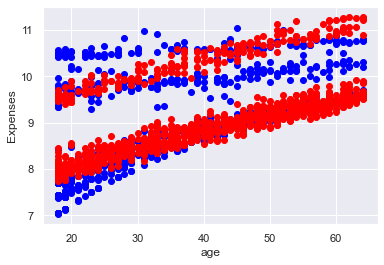

In [210]:
# Visual comparison between predicted and actual values
plt.scatter( X_train['age'] , y_train , color = 'blue') 
plt.scatter( X_train['age'] , y_pred_lin , color = 'red')

plt.xlabel("age")
plt.ylabel("Expenses")

plt.show()

In [211]:
logging.info('Linear regression model built successfully')

### Ridge Regression

In [212]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 
                    0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [213]:
from sklearn.metrics import r2_score

lambdas = [0.00001,0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 
                    0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000] 

for i in lambdas:
    ridgereg = Ridge(alpha=i)
    ridgereg.fit(X_train,y_train)
    
    y_pred = ridgereg.predict(X_train)
    
    print('Lambdas: ',i)
    print(r2_score(y_train,y_pred))
        
    y_predt = ridgereg.predict(X_test)
    
    print(r2_score(y_test,y_predt))
    print(ridgereg.coef_, '\n')

Lambdas:  1e-05
0.7640418463005499
0.7780463898666444
[ 0.03464261  0.01324741  0.09516523 -0.07393933  1.54521614 -0.05821179
 -0.14225618 -0.12061782] 

Lambdas:  0.0001
0.7640418463003694
0.7780463762392729
[ 0.03464261  0.01324741  0.09516523 -0.07393927  1.54521528 -0.05821168
 -0.14225599 -0.12061768] 

Lambdas:  0.001
0.7640418462823105
0.7780462399515174
[ 0.0346426   0.01324738  0.09516526 -0.07393859  1.54520671 -0.05821059
 -0.14225404 -0.12061626] 

Lambdas:  0.01
0.7640418444766386
0.7780448756702937
[ 0.03464252  0.01324711  0.09516556 -0.07393184  1.54512102 -0.05819967
 -0.14223455 -0.1206021 ] 

Lambdas:  0.1
0.7640416641228254
0.7780310926745937
[ 0.03464171  0.01324446  0.09516854 -0.0738644   1.54426458 -0.05809074
 -0.14203994 -0.12046074] 

Lambdas:  0.2
0.7640411185370911
0.7780154800808653
[ 0.03464082  0.01324151  0.09517183 -0.07378958  1.5433141  -0.05797013
 -0.14182429 -0.12030415] 

Lambdas:  0.3
0.7640402109600593
0.7779995548307652
[ 0.03463992  0.013238

In [214]:
ridge=pd.DataFrame(ridge_model_cv.cv_results_)
ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010607,0.004454,0.006592,0.002408,0.00001,{'alpha': 1e-05},-0.283862,-0.251785,-0.288340,-0.316846,-0.274863,-0.283139,0.021049,1,-0.280600,-0.286981,-0.279955,-0.264978,-0.279912,-0.278485,0.007257
1,0.007001,0.001096,0.004802,0.001331,0.0001,{'alpha': 0.0001},-0.283862,-0.251785,-0.288340,-0.316846,-0.274863,-0.283139,0.021049,2,-0.280600,-0.286981,-0.279955,-0.264978,-0.279912,-0.278485,0.007257
2,0.009742,0.003352,0.004659,0.000969,0.001,{'alpha': 0.001},-0.283862,-0.251785,-0.288341,-0.316846,-0.274863,-0.283139,0.021049,3,-0.280600,-0.286982,-0.279955,-0.264978,-0.279912,-0.278485,0.007257
3,0.006727,0.001097,0.003798,0.000748,0.01,{'alpha': 0.01},-0.283865,-0.251784,-0.288345,-0.316848,-0.274868,-0.283142,0.021050,4,-0.280603,-0.286986,-0.279956,-0.264982,-0.279913,-0.278488,0.007256
4,0.006800,0.000750,0.003997,0.000631,0.1,{'alpha': 0.1},-0.283894,-0.251780,-0.288387,-0.316865,-0.274917,-0.283169,0.021055,5,-0.280631,-0.287023,-0.279972,-0.265023,-0.279930,-0.278516,0.007253


In [215]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)

ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=1000]

ridge_cv_results[['param_alpha', 'mean_train_score',
                  'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.00001,-0.278485,-0.283139,1
1,0.0001,-0.278485,-0.283139,2
2,0.001,-0.278485,-0.283139,3
3,0.01,-0.278488,-0.283142,4
4,0.1,-0.278516,-0.283169,5
5,0.2,-0.278546,-0.283200,6
6,0.3,-0.278578,-0.283231,7
7,0.4,-0.278611,-0.283262,8
8,0.5,-0.278644,-0.283295,9
9,0.6,-0.278678,-0.283327,10


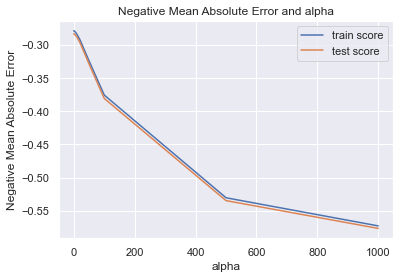

In [216]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])

plt.xlabel('alpha')

plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")

plt.legend(['train score', 'test score'], loc='upper right')

plt.show()

In [217]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=1e-05)

In [218]:
# check the coefficient values with lambda = 3.0

alpha = 1e-05

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

ridge.coef_

array([ 0.03464261,  0.01324741,  0.09516523, -0.07393933,  1.54521614,
       -0.05821179, -0.14225618, -0.12061782])

In [219]:
# Check the mean squared error

metrics.mean_squared_error(y_test, ridge.predict(X_test))

0.19169804030705992

In [220]:
metrics.r2_score(y_test, ridge.predict(X_test))

0.7780463898666444

In [221]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})

ridge_df.reset_index(drop=True, inplace=True)

ridge_df

,Features,Coefficient
0,age,0.0346
1,bmi,0.0132
2,children,0.0952
3,male,-0.0739
4,yes,1.5452
5,region__northwest,-0.0582
6,region__southeast,-0.1423
7,region__southwest,-0.1206


In [222]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))

ridge_coeff_dict

{'age': 0.0346,
 'bmi': 0.0132,
 'children': 0.0952,
 'male': -0.0739,
 'yes': 1.5452,
 'region__northwest': -0.0582,
 'region__southeast': -0.1423,
 'region__southwest': -0.1206}

In [223]:
print(f'Ridge Train R2 score: {round(metrics.r2_score(y_train, ridge.predict(X_train)),2)}')

print(f'Ridge Test R2 score : {round(metrics.r2_score(y_test, ridge.predict(X_test)),2)}')

Ridge Train R2 score: 0.7640418463005499
Ridge Test R2 score : 0.7780463898666444


In [224]:
logging.info('Ridge regression model built successfully')

### Lasso Regression

In [225]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [226]:
lambdas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01] # Higher the value of lambda,

for i in lambdas:
    lassoreg = Lasso(alpha=i)
    lassoreg.fit(X_train,y_train)

    y_pred = lassoreg.predict(X_train)
    
    print('Lambdas: ',i)
    print(r2_score(y_train,y_pred))
        
    y_predt = lassoreg.predict(X_test)
    
    print(r2_score(y_test,y_predt))
    print(lassoreg.coef_,'\n')

Lambdas:  0.0001
0.7640411186396353
0.7780054207723981
[ 0.03464241  0.01322487  0.09510481 -0.073491    1.54459719 -0.05661488
 -0.14055439 -0.11897898] 

Lambdas:  0.0002
0.764038935127777
0.7779631701632228
[ 0.03464221  0.01320232  0.0950444  -0.07304267  1.54397815 -0.05501751
 -0.13885221 -0.11733985] 

Lambdas:  0.0003
0.7640352862043294
0.7779195747956285
[ 0.03464201  0.01317968  0.09498396 -0.07259435  1.54335928 -0.05341461
 -0.13714552 -0.11569735] 

Lambdas:  0.0004
0.764030200348509
0.7778748430957072
[ 0.0346418   0.01315722  0.09492356 -0.072146    1.54274009 -0.05182267
 -0.13544777 -0.11406153] 

Lambdas:  0.0005
0.7640236012069266
0.7778285403392378
[ 0.03464162  0.01313441  0.09486308 -0.0716977   1.54212153 -0.05020867
 -0.13373203 -0.11241226] 

Lambdas:  0.001
0.7639691301769689
0.7775794763543981
[ 0.03464058  0.01302213  0.09456109 -0.06945595  1.53902553 -0.04225128
 -0.12524516 -0.10423457] 

Lambdas:  0.002
0.7637511455163027
0.7769855086449975
[ 0.03463853 

In [227]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)

lasso_cv_results[['param_alpha', 'mean_train_score', 
                  'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
5,0.001,-0.278244,-0.282846,1
6,0.002,-0.278259,-0.282876,2
4,0.0005,-0.278338,-0.282943,3
3,0.0004,-0.278362,-0.282975,4
2,0.0003,-0.278388,-0.283011,5
1,0.0002,-0.278417,-0.283048,6
0,0.0001,-0.278450,-0.283092,7
7,0.003,-0.278508,-0.283119,8
8,0.004,-0.278802,-0.283259,9
9,0.005,-0.279152,-0.283409,10


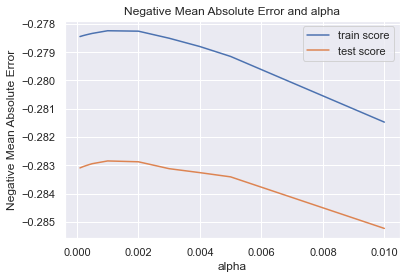

In [228]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])

plt.xlabel('alpha')

plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")

plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [229]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.001)

In [230]:
# check the coefficient values with lambda = 0.005

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.03464058,  0.01302213,  0.09456109, -0.06945595,  1.53902553,
       -0.04225128, -0.12524516, -0.10423457])

In [231]:
# Check the mean squared error

metrics.mean_squared_error(y_test, lasso.predict(X_test))

0.1921013065807499

In [232]:
metrics.r2_score(y_test, lasso.predict(X_test))

0.7775794763543981

In [233]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})

lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]

lasso_df.reset_index(drop=True, inplace=True)

lasso_df

,Features,Coefficient
0,age,0.0346
1,bmi,0.0130
2,children,0.0946
3,male,-0.0695
4,yes,1.5390
5,region__northwest,-0.0423
6,region__southeast,-0.1252
7,region__southwest,-0.1042


In [234]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))

lasso_coeff_dict

{'age': 0.034640577335149206,
 'bmi': 0.013022133057564694,
 'children': 0.09456109182430703,
 'male': -0.06945594859444187,
 'yes': 1.539025528994772,
 'region__northwest': -0.042251279675277656,
 'region__southeast': -0.12524515648162018,
 'region__southwest': -0.10423457065459348}

In [235]:
print(f'Lasso Train R2 score: {round(metrics.r2_score(y_train, lasso.predict(X_train)),2)}')
print(f'Lasso Test R2 score : {round(metrics.r2_score(y_test, lasso.predict(X_test)),2)}')

Lasso Train R2 score: 0.7639691301769689
Lasso Test R2 score : 0.7775794763543981


In [236]:
logging.info('Lasso regression model built successfully')

## Decision Tree

In [237]:
X_train.head()

,age,bmi,children,male,yes,region__northwest,region__southeast,region__southwest
693,24,23.7,0,1,0,1,0,0
1297,28,26.5,2,0,0,0,1,0
634,51,39.7,1,1,0,0,0,1
1022,47,36.1,1,1,1,0,1,0
178,46,28.9,2,0,0,0,0,1


In [238]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10,
                           random_state= 0)

In [239]:
Dec_tree = DT.fit(X_train, y_train)
Dec_tree

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, min_samples_split=5,
                      random_state=0)

In [240]:
y_train_pred_DT= Dec_tree.predict(X_train)

print('r2_score on training data =', metrics.r2_score(y_true=y_train,
                                                      y_pred=y_train_pred_DT))

r2_score on training data = 0.8316740260096386


In [241]:
y_test_pred_DT = Dec_tree.predict(X_test)

print('r2_score on test data =', metrics.r2_score(y_true=y_test,
                                                  y_pred=y_test_pred_DT))

r2_score on test data = 0.8076730903693128


In [242]:
from sklearn.model_selection import GridSearchCV

param_grid = {"criterion" : ['mae', 'mse'],
              "min_samples_split": [ 3, 5, 10, 15, 20, 25, 30, 35, 40],
              "max_depth": [2, 3, 4, 5],
              "min_samples_leaf": [10, 20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


grid_cv_Dec_tree = GridSearchCV(Dec_tree, param_grid, cv=5, n_jobs = -1, verbose = 1)

%time

grid_cv_Dec_tree.fit(X,y)

Wall time: 0 ns
Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5,
                                             random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['mae', 'mse'], 'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [10, 20, 40, 100],
                         'min_samples_split': [3, 5, 10, 15, 20, 25, 30, 35,
                                               40]},
             verbose=1)

In [243]:
print("R-Squared::{}".format(grid_cv_Dec_tree.best_score_))

print("Best Hyperparameters::\n{}".format(grid_cv_Dec_tree.best_params_))

R-Squared::0.8232815598989454
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 5, 'max_leaf_nodes': 100, 'min_samples_leaf': 10, 'min_samples_split': 25}


In [244]:
param_grid = {"criterion": ["mse"],
              "min_samples_split": [25],
              "max_depth": [5],
              "min_samples_leaf": [10],
              "max_leaf_nodes": [100],
              }

grid_cv_Dec_tree = GridSearchCV(Dec_tree, param_grid, cv=5)

grid_cv_Dec_tree.fit(X,y)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5,
                                             random_state=0),
             param_grid={'criterion': ['mse'], 'max_depth': [5],
                         'max_leaf_nodes': [100], 'min_samples_leaf': [10],
                         'min_samples_split': [25]})

In [245]:
from sklearn.model_selection import cross_val_score

r2_scores_DT_train = cross_val_score(grid_cv_Dec_tree.best_estimator_, 
                                     X, 
                                     y, 
                                     cv=10)

mse_scores = cross_val_score(grid_cv_Dec_tree.best_estimator_, 
                             X, 
                             y, 
                             cv=10,
                             scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores_DT_train)))

print("MSE::{:.3f}".format(np.mean(mse_scores)))

avg R-squared::0.827
MSE::-0.145


In [246]:
best_dtm_model = grid_cv_Dec_tree.best_estimator_

y_test_pred_DT = best_dtm_model.predict(X_test)

r2_score_DT_test = best_dtm_model.score(X_test,y_test_pred_DT)
print("R-squared:{:.3f}".format(r2_score_DT_test))
print("MSE: %.2f" % metrics.mean_squared_error(y_test_pred_DT, y_test_pred_DT))

R-squared:1.000
MSE: 0.00


In [247]:
logging.info('Decision Tree model built successfully')

### Random Forest Regressor

In [248]:
from sklearn.ensemble import RandomForestRegressor

In [249]:
rf = RandomForestRegressor(random_state = 42, 
                           max_depth = 5, 
                           n_jobs = -1, 
                           min_samples_leaf = 10)

In [250]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_jobs=-1,
                      random_state=42)

In [251]:
sample_tree = rf.estimators_[1]

In [252]:
y_train_pred = rf.predict(X_train)

y_test_pred = rf.predict(X_test)

In [253]:
rf.feature_importances_

array([0.41147524, 0.0396463 , 0.03259282, 0.00279536, 0.51093814,
       0.00061145, 0.00098379, 0.00095689])

In [254]:
Imp_df = pd.DataFrame({
    'Varname': X_train.columns,
    'Imp' : rf.feature_importances_
})
Imp_df

,Varname,Imp
0,age,0.411475
1,bmi,0.039646
2,children,0.032593
3,male,0.002795
4,yes,0.510938
5,region__northwest,0.000611
6,region__southeast,0.000984
7,region__southwest,0.000957


In [255]:
Imp_df.sort_values(by = 'Imp', ascending = False)

,Varname,Imp
4,yes,0.510938
0,age,0.411475
1,bmi,0.039646
2,children,0.032593
3,male,0.002795
6,region__southeast,0.000984
7,region__southwest,0.000957
5,region__northwest,0.000611


In [256]:
print(f'DT Train R2 Score: {round(r2_score(y_train, y_train_pred),2)}')

print(f'DT Test R2 Score: {round(r2_score(y_test, y_test_pred),2)}')

DT Train R2 Score: 0.8551425516163221
DT Test R2 Score: 0.8292599472087533


In [257]:
logging.info('Random Forest Regressor model built successfully')

## Gradient Boosting

In [258]:
from sklearn.ensemble import GradientBoostingRegressor

gbm=GradientBoostingRegressor(n_estimators=400, 
                              max_depth=5, 
                              loss='ls',
                              min_samples_split=2,
                              learning_rate=0.1)

gbm_model = gbm.fit(X_train, y_train)
gbm_model

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [259]:
y_train_pred_gbm= gbm_model.predict(X_train)

print('r2_score on training data =', round(metrics.r2_score(y_true=y_train,
                                                      y_pred=y_train_pred_gbm),2)

r2_score on training data = 0.9927742825971518


In [260]:
y_test_pred_gbm = Dec_tree.predict(X_test)

print('r2_score on test data =', round(metrics.r2_score(y_true=y_test,
                                                  y_pred=y_test_pred_gbm),2)

r2_score on test data = 0.8076730903693128


In [261]:
param_grid={'n_estimators':[500,1000,2000],
             'learning_rate':[.001,0.01,.1],
             'max_depth':[1,2,4],
             'subsample':[.5,.75,1],
             'random_state':[1]}

grid_cv_gbm = GridSearchCV(gbm_model, param_grid, cv=5)

grid_cv_gbm.fit(X,y)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=5, n_estimators=400),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 4],
                         'n_estimators': [500, 1000, 2000], 'random_state': [1],
                         'subsample': [0.5, 0.75, 1]})

In [262]:
print("R-Squared:{}".format(round(grid_cv_gbm.best_score_,2))

print("Best Hyperparameters::\n{}".format(grid_cv_gbm.best_params_))

R-Squared::0.8320638789212282
Best Hyperparameters::
{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'random_state': 1, 'subsample': 0.75}


In [263]:
param_grid={'n_estimators':[500],
             'learning_rate':[0.01],
             'max_depth':[4],
             'subsample':[.75],
             'random_state':[1]}

grid_cv_gbm = GridSearchCV(gbm_model, param_grid, cv=5)

grid_cv_gbm.fit(X,np.expm1(y))

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=5, n_estimators=400),
             param_grid={'learning_rate': [0.01], 'max_depth': [4],
                         'n_estimators': [500], 'random_state': [1],
                         'subsample': [0.75]})

In [264]:
r2_scores_gdm_train = cross_val_score(grid_cv_gbm.best_estimator_, 
                                      X, 
                                      y, 
                                      cv=10)

mse_scores = cross_val_score(grid_cv_gbm.best_estimator_, 
                             X, 
                             y, 
                             cv=10,
                             scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores_gdm_train)))

print("MSE::{:.3f}".format(np.mean(mse_scores)))

avg R-squared::0.833
MSE::-0.139


In [265]:
best_dtm_model = grid_cv_gbm.best_estimator_

y_test_pred_gbm = best_dtm_model.predict(X_test)

r2_scores_gdm_test = best_dtm_model.score(X_test,y_test_pred_gbm)

print("R-squared:{:.3f}".format(r2_scores_gdm_test))

print("MSE: %.2f" % metrics.mean_squared_error(y_test_pred_DT, y_test_pred_gbm))

R-squared:1.000
MSE: 312824993.17


In [266]:
logging.info('Gradient boosting model built successfully')

In [267]:
logging.info('Model Selection done')

### Selecting Gradient boosting model

In [268]:
import pickle

In [269]:
import sklearn.externals as extjoblib
import joblib

joblib.dump(grid_cv_gbm, 'model/premium_prediction_model.pkl')

premium_pred_model = joblib.load('model/premium_prediction_model.pkl')

In [270]:
logging.info('Pickle File generated successfully')

In [271]:
print('Pickle File generated successfully')

Pickle File generated successfully
